**The purpose of this notebook will classify EY employees as Audit, Consulting, or Other focused. It then does a initial analysis of the data. The dataset will then be exported to a CSV file and used for the next analysis, which will classify job changes as lateral, promotion, demotion, or exit move.**

# Set Up

## Install Libraries

In [ ]:
!pip install pandas pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import datetime

## Mount Drive

In [ ]:
# Needed to get access to data and read it in
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data

Employment history for all workers who EVER worked at EY

In [ ]:
# File path to data
ey_employee_data = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Sam_EY_Sample.dta'

# Read Stata file and convert to pandas DataFrame
ey_employee_df, ey_employee_meta = pyreadstat.read_dta(ey_employee_data)

ey_employee_df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,numeric_company_id,ey_ind,ey_ever
0,728.0,0,11-3011.00,General Manager (Management),Administrative Manager,1993-01-01,2010-01-01,7083619,1,1
1,728.0,1,11-9199.00,General Manager (Management),\N,NaN,NaN,7083619,1,1
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,7083619,1,1
3,1282.0,1,11-3031.02,General Manager (Management),Manager,2008-01-01,2012-07-01,97779,0,1
4,1282.0,2,11-3031.02,Financial Systems Manager,Assistant Vice President/Compliance Officer,2002-01-01,2008-01-01,9553991,0,1


This dataset is the same as the first analysis on the Deloitte data just for EY. Columns represent the same thing in both datasets.

# Exploratory Analysis

## How much data do we have?

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = ey_employee_df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 1445308
Number of Columns: 10


Have about 1 million rows of data of employees who ever worked at EY.

## Of that data, how much data do we have on EY employment and previous employment?

1 = EY job/employment

0 = Previous job/employment

In [ ]:
column_name = 'ey_ind'

value_counts = ey_employee_df[column_name].value_counts()

print(f"Count of 0's: {value_counts.get(0, 0)}")
print(f"Count of 1's: {value_counts.get(1, 0)}")

Count of 0's: 1120997
Count of 1's: 324311


We have about 320 thousand rows of EY job employement and 1M rows of previous job history of people who worked at EY.

## Of that data, how many ever worked at EY?

This should only return 1's.

In [ ]:
column_name = 'ey_ever'

value_counts = ey_employee_df[column_name].value_counts()

print(f"Count of 0's: {value_counts.get(0, 0)}")
print(f"Count of 1's: {value_counts.get(1, 0)}")

Count of 0's: 0
Count of 1's: 1445308


## How many unique titles?

In [ ]:
title_column = 'Title1'

# Count the number of unique titles
num_unique_titles = ey_employee_df[title_column].nunique()

# List all unique titles
unique_titles = ey_employee_df[title_column].unique()

print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 4994
List of unique titles:
['General Manager (Management)' 'Financial Systems Manager'
 'Risk and Assurance Manager' ... 'Dozer Operator' 'Machinist Mate'
 'Computer Aided Design (CAD) Engineer']


There are almost 5k unique titles in Title1. Lets look at Title2.

In [ ]:
title_column = 'Title2'

# Count the number of unique titles
num_unique_titles = ey_employee_df[title_column].nunique()

# List all unique titles
unique_titles = ey_employee_df[title_column].unique()

print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 38583
List of unique titles:
['Administrative Manager' '\\N' 'Manager' ... 'Tea Guide'
 'Specialty Merchandise Associate' 'Technical Education Consultant']


There are almost 3k unique titles in Title2.

## How many unquie ONET values?

In [ ]:
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = ey_employee_df[onet_column].nunique()

# List all onet values
#unique_onet = ey_employee_df[onet_column].unique()

print(f"Number of unique ONET values: {num_unique_onet}")
#print("List of ONET values:")
#print(unique_onet)

Number of unique ONET values: 952


About 950 unique ONET values to categorize.

# Classification

Now need to classify EY employees job history as either audit, consulting, or other focused. To do this we are strictly looking at ONET value to categorize them.  We think we should ultimately use the occupation code for the final classification of audit or consulting (or neither). The analysis on titles can be useful in the sense that some occupation titles may pick up a little of consulting and auditing simultaneously. If an occupation achieves a majority of the indicators from the text (or sensibly fits into one category), then the occupation code itself should be sufficent for categorization.

## Copy df

In [ ]:
# Copy over entire df to make edits. Want to keep the original df the same.
df = ey_employee_df.copy()

# List of columns to drop
columns_to_drop = ['numeric_company_id', 'ey_ever']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind
0,728.0,0,11-3011.00,General Manager (Management),Administrative Manager,1993-01-01,2010-01-01,1
1,728.0,1,11-9199.00,General Manager (Management),\N,NaN,NaN,1
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,1
3,1282.0,1,11-3031.02,General Manager (Management),Manager,2008-01-01,2012-07-01,0
4,1282.0,2,11-3031.02,Financial Systems Manager,Assistant Vice President/Compliance Officer,2002-01-01,2008-01-01,0


## Function to categorize groups

In [ ]:
# Create function that uses ONLY ONET values to categorize people as audit, consulting, or other.
# use https://www.onetonline.org/ to look up job categories and get back ONET values
def categorize_job(df):
    def categorize(row):
        if row['onet'] == '13-2011.00' or row['onet'] == '47-4011.01' or row['onet'] == '43-3031.00' or row['onet'] == '13-2099.04' or row['onet'] == '13-2061.00' or row['onet'] == '13-2011.01' or row['onet'] == '13-2011.02' or row['onet'] == '13-2031.00' or row['onet'] == '13-1199.01' or row['onet'] == '11-9199.02' or row['onet'] == '13-1031.02' or row['onet'] == '13-1041.00' or row['onet'] == '43-9041.00' or row['onet'] == '13-1031.00' or row['onet'] == '13-2041.00':
            return 'Auditing'
        elif row['onet'] == '13-1111.00' or row['onet'] == '13-1051.00' or row['onet'] == '13-1141.00' or row['onet'] == '13-2054.00' or row['onet'] == '13-2099.01' or row['onet'] == '15-1211.00' or row['onet']== '15-1121.00' or row['onet'] == '15-1199.10' or row['onet'] == '15-2031.00' or row['onet'] == '15-1199.08' or row['onet'] == '13-2071.00' or row['onet'] == '15-1212.00' or row['onet'] == '13-1199.07' or row['onet'] == '13-2099.02' or row['onet'] == '13-2051.00' or row['onet'] == '11-2021.00' or row['onet'] == '13-1161.00' or row['onet'] == '15-1122.00' or row['onet'] == '19-2041.01':
            return 'Consulting'
        else:
            return 'Other'

    df['Categorization'] = df.apply(categorize, axis=1)
    return df

df = categorize_job(df)
df

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization
0,7.280000e+02,0,11-3011.00,General Manager (Management),Administrative Manager,1993-01-01,2010-01-01,1,Other
1,7.280000e+02,1,11-9199.00,General Manager (Management),\N,NaN,NaN,1,Other
2,1.282000e+03,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,1,Consulting
3,1.282000e+03,1,11-3031.02,General Manager (Management),Manager,2008-01-01,2012-07-01,0,Other
4,1.282000e+03,2,11-3031.02,Financial Systems Manager,Assistant Vice President/Compliance Officer,2002-01-01,2008-01-01,0,Other
...,...,...,...,...,...,...,...,...,...
1445303,1.374304e+14,0,13-2051.00,Financial Analyst,Financial Analyst,2016-11-01,NaN,0,Consulting
1445304,1.374304e+14,1,13-2011.01,Tax Associate,Tax Associate,2012-06-01,2016-10-01,1,Auditing
1445305,1.374304e+14,2,13-2011.01,Accountant,Accountant,2010-12-01,2012-06-01,0,Auditing
1445306,1.374304e+14,0,15-1199.01,Assurance Manager,Assurance Staff,2019-09-01,NaN,1,Other


In [ ]:
# Count occurrences of each group
group_counts = df['Categorization'].value_counts()

print("Count of each group:")
print(group_counts)

Count of each group:
Other         1051748
Auditing       210342
Consulting     183218
Name: Categorization, dtype: int64


In [ ]:
df.shape

(1445308, 9)

In [ ]:
ey_employee_df.shape
# This is the same shape as original df so all good.

(1445308, 10)

We have a lot of employees not categorized yet so we need to refine the function. Let's look specifically at rows that were not categorized yet.

## Test/Refine Function

In [ ]:
column_name = 'Categorization'

# Want to see rows that were categorized as 'Other'
target_value = 'Other'

# Using loc to filter the df based on the condition
not_cat_records = df.loc[df[column_name] == target_value]

# Convert the result to a new df
not_cat_df = pd.DataFrame(not_cat_records)

not_cat_df

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization
0,7.280000e+02,0,11-3011.00,General Manager (Management),Administrative Manager,1993-01-01,2010-01-01,1,Other
1,7.280000e+02,1,11-9199.00,General Manager (Management),\N,NaN,NaN,1,Other
3,1.282000e+03,1,11-3031.02,General Manager (Management),Manager,2008-01-01,2012-07-01,0,Other
4,1.282000e+03,2,11-3031.02,Financial Systems Manager,Assistant Vice President/Compliance Officer,2002-01-01,2008-01-01,0,Other
5,1.282000e+03,3,11-3031.02,Risk and Assurance Manager,Assurance Services Manager,1991-01-01,2002-01-01,0,Other
...,...,...,...,...,...,...,...,...,...
1445298,1.374304e+14,5,19-4099.00,Graduate Assistant,Research Assistant,2016-08-01,2018-06-01,0,Other
1445299,1.374304e+14,6,41-3031.02,Financial Sales Consultant,Financial Services Consultant,2016-05-01,2016-09-01,0,Other
1445300,1.374304e+14,7,43-6011.00,Editorial Assistant,Assistant Director,2014-12-01,2015-11-01,0,Other
1445302,1.374304e+14,9,99-1111.00,Not a Job,Intern,2012-05-01,2012-07-01,0,Other


In [ ]:
# Get all unique ONET values from uncategorized df to group them

onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = not_cat_df[onet_column].nunique()

# List all onet values
unique_onet = not_cat_df[onet_column].unique()

print(f"Number of unique ONET values: {num_unique_onet}")
print("List of ONET values:")
unique_onet

Number of unique ONET values: 923
List of ONET values:


array(['11-3011.00', '11-9199.00', '11-3031.02', '23-1011.00',
       '11-2022.00', '13-1199.00', '99-9999.00', '25-9041.00',
       '99-1111.00', '19-4099.00', '\\N', '11-1011.00', '11-9032.00',
       '11-3031.01', '15-1142.00', '41-1012.00', '15-1151.00',
       '41-2031.00', '27-2022.00', '41-3031.02', '25-1191.00',
       '11-2011.00', '11-3021.00', '15-1199.01', '15-1132.00',
       '43-6011.00', '15-1134.00', '15-1199.02', '27-3031.00',
       '41-9022.00', '23-2011.00', '11-1021.00', '11-3051.00',
       '13-1071.00', '11-3121.00', '43-4051.00', '15-1111.00',
       '13-1023.00', '11-9041.00', '25-3099.02', '43-1011.00',
       '11-9111.00', '11-9141.00', '21-1093.00', '43-6014.00',
       '13-2052.00', '43-9061.00', '11-2031.00', '13-2081.00',
       '27-3099.00', '43-4161.00', '25-3099.00', '41-3031.00',
       '13-1151.00', '11-9199.04', '41-3031.01', '19-3011.00',
       '41-9021.00', '41-3021.00', '25-1199.00', '11-3131.00',
       '11-9031.00', '25-2052.00', '11-3031.00',

Went through each ONET value not grouped to see if they belong in the consulting, auditing, or other focus group.

In [ ]:
# Save dataset to CSV file so don't have to rerun code above each time
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_all_categorized_employment.gz'

# Save to csv
df.to_csv(file_path, index=False, compression='gzip') # Needed to zip file because it is too large

In [ ]:
# Reread data back in to a df

# File path to get data
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_all_categorized_employment.gz'

df = pd.read_csv(file_path, compression='gzip')
df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization
0,728.0,0,11-3011.00,General Manager (Management),Administrative Manager,1993-01-01,2010-01-01,1,Other
1,728.0,1,11-9199.00,General Manager (Management),\N,NaN,NaN,1,Other
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,1,Consulting
3,1282.0,1,11-3031.02,General Manager (Management),Manager,2008-01-01,2012-07-01,0,Other
4,1282.0,2,11-3031.02,Financial Systems Manager,Assistant Vice President/Compliance Officer,2002-01-01,2008-01-01,0,Other


In [ ]:
df.shape

(1445308, 9)

# Plots

In [ ]:
# Want to see how over time, the number of auditors and consulting jobs have increased or decreased.

# Filtering the df to only include consulting and auditing data since this is what we are interested in
clean_df = df[df['Categorization'].isin(['Consulting', 'Auditing'])]
clean_df.shape

In [ ]:
clean_df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,1,Consulting
6,1282.0,4,13-2011.01,Staff Accountant,Staff Accountant/Supervisor,1989-01-01,1991-01-01,0,Auditing
7,1282.0,5,13-2011.01,Staff Accountant,Staff Accountant,1987-01-01,1989-01-01,0,Auditing
10,1406.0,1,13-2011.01,Banker,Associate,2010-01-01,2011-01-01,0,Auditing
11,1406.0,2,13-2011.01,Banker,Associate,2007-01-01,2009-01-01,0,Auditing


Results in 393,560 rows for clean_df which contains only audit and consulting categories data.

## Distribution of Groups over Time

<ipython-input-47-91385dc80bc0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



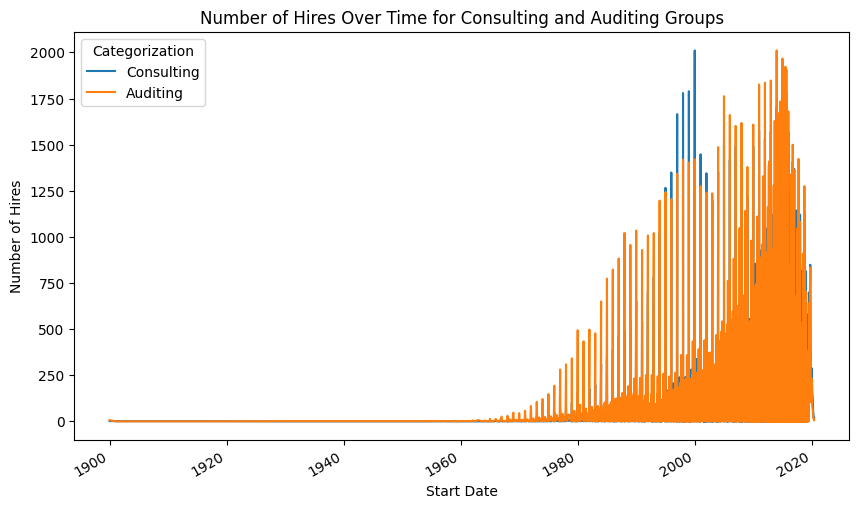

In [ ]:
# Now have the df with the desired rows, plot the data.

# Convert 'start_date' to datetime
clean_df['start_dt'] = pd.to_datetime(clean_df['start_dt'])

# Group by 'Group' and 'start_dt', then count the number of hires for each group
grouped_df = clean_df.groupby(['Categorization', 'start_dt']).size().reset_index(name='count')

# Pivot the df to have 'Group' as columns
pivoted_df = grouped_df.pivot(index='start_dt', columns='Categorization', values='count').fillna(0)

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines
pivoted_df[['Consulting', 'Auditing']].plot(kind='line', ax=ax)

# Add labels and title
plt.xlabel('Start Date')
plt.ylabel('Number of Hires')
plt.title('Number of Hires Over Time for Consulting and Auditing Groups')

# Show the plot
plt.show()

Compared to Deloitte there is more of an an increase in auditors over time. Deloitte had more of an increase of consulters.

We we want to know the distribution of occupation codes (ONET) for both groups to know if we are being consistent.

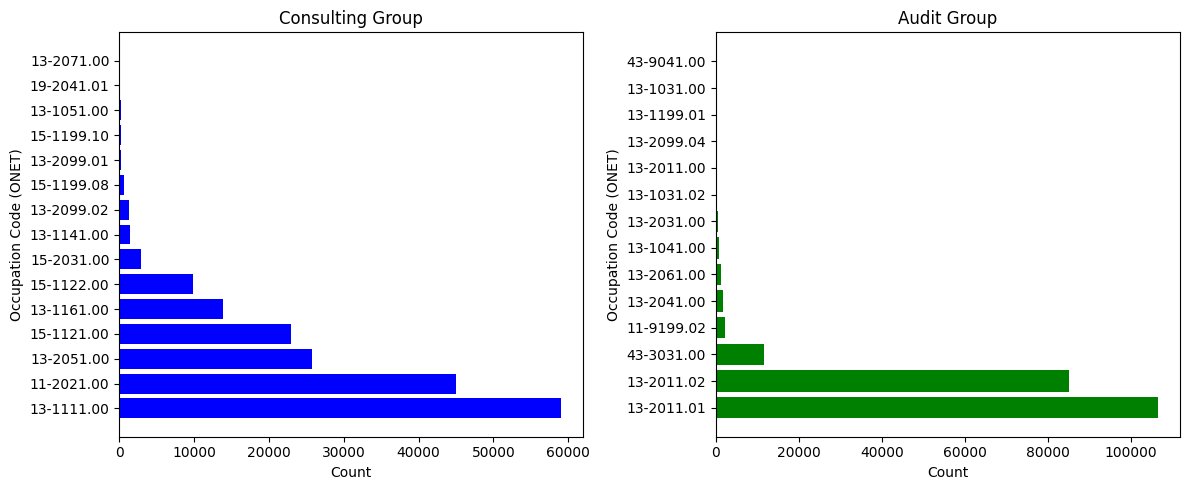

In [ ]:
# Filter data for consulting and auditing groups into different dfs
consulting_data = clean_df[clean_df['Categorization'] == 'Consulting']
audit_data = clean_df[clean_df['Categorization'] == 'Auditing']

# Count the occurrences of each occupation code for consulting and auditing groups
consulting_counts = consulting_data['onet'].value_counts()
audit_counts = audit_data['onet'].value_counts()

# Plot the distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Consulting Group
axes[0].barh(consulting_counts.index, consulting_counts.values, color='blue')
axes[0].set_title('Consulting Group')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Occupation Code (ONET)')

# Audit Group
axes[1].barh(audit_counts.index, audit_counts.values, color='green')
axes[1].set_title('Audit Group')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Occupation Code (ONET)')

plt.tight_layout()
plt.show()

Another way to visualize distribution of ONET values for each group is in a dashboard.

## Distribution of ONET values

Dashboard that shows the distribution of ONET values for each group.

In [ ]:
!pip install dash pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Onet Value Distribution"),

    # Dropdown for selecting the group
    dcc.Dropdown(
        id='group-dropdown',
        options=[
            {'label': 'Consulting', 'value': 'Consulting'},
            {'label': 'Auditing', 'value': 'Auditing'}
        ],
        value='Consulting',  # Set the default value
        style={'width': '50%'}
    ),

    # Slider for selecting top N onet values
    dcc.Slider(
        id='top-n-slider',
        min=1,
        max=20,
        step=1,
        marks={i: str(i) for i in range(1, 21)},
        value=10
    ),

    # Bar chart displaying the count of occurrences
    dcc.Graph(id='onet-distribution-chart')
])

# Define callback to update the bar chart based on dropdown and slider values
@app.callback(
    Output('onet-distribution-chart', 'figure'),
    [Input('group-dropdown', 'value'),
     Input('top-n-slider', 'value')]
)
def update_bar_chart(selected_group, top_n):
    # Filter data based on selected group
    group_data = clean_df[clean_df['Categorization'] == selected_group]

    # Calculate counts for each onet value
    onet_counts = group_data['onet'].value_counts().head(top_n)

    # Create bar chart using plotly express
    fig = px.bar(x=onet_counts.index, y=onet_counts.values, labels={'x': 'onet', 'y': 'Count'},
                 title=f'Top {top_n} Onet Values - {selected_group}')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Double check ONET value counts from chart above

In [ ]:
# Check Consulting group ONET values
# onet_value = '13-1111.00' # first onet record in the chart for Consulting group
onet_value = '11-2021.00'

filtered_records = consulting_data[consulting_data['onet'] == onet_value]
filtered_records.shape

(44993, 9)

In [ ]:
# Check Audit group ONET values
onet_value = '13-2011.01'

filtered_records = audit_data[audit_data['onet'] == onet_value]
filtered_records.shape

(106570, 9)

Looks good, now want to see the same data in chart form.


In [ ]:
# Display the counts in a DataFrame
consulting_counts_df = pd.DataFrame(consulting_counts.items(), columns=['Occupation Code (ONET)', 'Consulting Count'])
audit_counts_df = pd.DataFrame(audit_counts.items(), columns=['Occupation Code (ONET)', 'Audit Count'])

# merge the two DataFrames on the Occupation Code (onet)
merged_counts_df = pd.merge(consulting_counts_df, audit_counts_df, on='Occupation Code (ONET)', how='outer').fillna(0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

merged_counts_df

,Occupation Code (ONET),Consulting Count,Audit Count
0,13-1111.00,59061.0,0.0
1,11-2021.00,44993.0,0.0
2,13-2051.00,25774.0,0.0
3,15-1121.00,22889.0,0.0
4,13-1161.00,13884.0,0.0
5,15-1122.00,9797.0,0.0
6,15-2031.00,2918.0,0.0
7,13-1141.00,1390.0,0.0
8,13-2099.02,1253.0,0.0
9,15-1199.08,651.0,0.0


This is good, there is no over lap in ONET values being counted in both groups.

# Experience

Want numerical data on how much experience a person has in consulting and/or auditing field(s). Create new columns that include rolling years experience.

In [ ]:
clean_df.dtypes

id                       float64
job_number                 int64
onet                      object
Title1                    object
Title2                    object
start_dt          datetime64[ns]
end_dt                    object
ey_ind                     int64
Categorization            object
dtype: object

In [ ]:
# sort the DataFrame by 'start_dt' column within each 'id' group
clean_df.sort_values(by=['id', 'start_dt'], inplace=True)

# group by 'id' and fill NaN values in 'end_dt' with the next job entry's 'start_dt'
clean_df['end_dt'] = clean_df.groupby('id')['end_dt'].fillna(clean_df.groupby('id')['start_dt'].shift(-1))

<ipython-input-50-163c92e7d002>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-163c92e7d002>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Convert date columns to datetime format
clean_df['end_dt'] = pd.to_datetime(clean_df['end_dt'])

# create a new column 'new_end_dt' to preserve 'end_dt' without filling NaN. If NaT fill with todays date
clean_df['new_end_dt'] = clean_df['end_dt'].fillna(pd.Timestamp.today())

# initialize columns for total audit and consulting years
clean_df['Total_Audit_Years'] = 0
clean_df['Total_Consulting_Years'] = 0

# Loop through each persons job history
for person_id, person_data in clean_df.groupby('id'):
    person_data = person_data.sort_values(by='start_dt')

    total_audit_years = 0
    total_consulting_years = 0

    for index, row in person_data.iterrows():
      end_date = row['new_end_dt']  # Use the new_end_dt column bc no NaT's

      # Running totals for how many yrs exp as either Audit or Consulting
      if row['Categorization'] == 'Auditing':
        total_audit_years += (end_date - row['start_dt']).days / 365.25
        clean_df.loc[index, 'Total_Audit_Years'] = total_audit_years

      if row['Categorization'] == 'Consulting':
        total_consulting_years += (end_date - row['start_dt']).days / 365.25
        clean_df.loc[index, 'Total_Consulting_Years'] = total_consulting_years


<ipython-input-51-1584b5554830>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-1584b5554830>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-1584b5554830>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-1584b55

In [ ]:
# group by 'id' and find the maximum values of 'Total_Audit_Years' and 'Total_Consulting_Years' for each ID
grouped_df = clean_df.groupby('id').agg({
    'Total_Audit_Years': 'max',
    'Total_Consulting_Years': 'max'
})

# compare the maximum values to determine the audit-focused indicator
grouped_df['Audit_Focused_Indicator'] = grouped_df['Total_Audit_Years'] > grouped_df['Total_Consulting_Years']

# merge the result back to the original df based on 'id'
clean_df = clean_df.merge(grouped_df[['Audit_Focused_Indicator']], on='id', how='left')

In [ ]:
clean_df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
0,1282.0,5,13-2011.01,Staff Accountant,Staff Accountant,1987-01-01,1989-01-01,0,Auditing,1989-01-01 00:00:00.000000,2.001369,0.000000,False
1,1282.0,4,13-2011.01,Staff Accountant,Staff Accountant/Supervisor,1989-01-01,1991-01-01,0,Auditing,1991-01-01 00:00:00.000000,4.000000,0.000000,False
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaT,1,Consulting,2024-03-31 21:22:05.518488,0.000000,12.665298,False
3,1406.0,2,13-2011.01,Banker,Associate,2007-01-01,2009-01-01,0,Auditing,2009-01-01 00:00:00.000000,2.001369,0.000000,True
4,1406.0,1,13-2011.01,Banker,Associate,2010-01-01,2011-01-01,0,Auditing,2011-01-01 00:00:00.000000,3.000684,0.000000,True


In [ ]:
clean_df.shape # good rows the same, didn't lose data
# 393560 rows

(393560, 13)

In [ ]:
# Sanity check to make sure being calculated correctly
# Let's look at a specific id
id = 1282.0

# Retrieve records with the specific onet value
filtered_records = clean_df[(clean_df['id'] == id)]
filtered_records

# ID num 1282.0 first job was 1/1/87 - 1/1/89 as a Staff Accountant that is categorized as auditing (at nonEY)
# Then changed jobs 1/1/89 - 1/1/91 as a Staff Accountant that is categorized as auditing again (nonEY)
# Then 8/1/11 - NaT was a General Manager (Management) that is categorized as consulting (at EY)

# this check is good. The counts are good and the audit focused indicator is correct. Since she has 12 yrs exp
# in consult positions and 4 yrs exp in audit position, then they are false for audit_focused_ind bc more yrs
# in consult position at EY

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
0,1282.0,5,13-2011.01,Staff Accountant,Staff Accountant,1987-01-01,1989-01-01,0,Auditing,1989-01-01 00:00:00.000000,2.001369,0.000000,False
1,1282.0,4,13-2011.01,Staff Accountant,Staff Accountant/Supervisor,1989-01-01,1991-01-01,0,Auditing,1991-01-01 00:00:00.000000,4.000000,0.000000,False
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaT,1,Consulting,2024-03-31 21:22:05.518488,0.000000,12.665298,False


In [ ]:
# Another sanity check to make sure being calculated correctly
# Let's look at a specific id
id = 1406.0

filtered_records = clean_df[(clean_df['id'] == id)]
filtered_records

# ID num 1406.0 first job was 1/1/07 - 1/1/09 as a Banker that is categorized as auditing (at nonEY)
# Then changed jobs 1/1/10 - 1/1/11 as a Banker that is categorized as auditing again (nonEY)

# this check is good. The counts are good and the audit focused indicator is correct. Since they have
# only have exp in auditing group, 3 yrs exp, then they are true for audit_focused_ind.

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
3,1406.0,2,13-2011.01,Banker,Associate,2007-01-01,2009-01-01,0,Auditing,2009-01-01,2.001369,0.0,True
4,1406.0,1,13-2011.01,Banker,Associate,2010-01-01,2011-01-01,0,Auditing,2011-01-01,3.000684,0.0,True


In [ ]:
# Save dataset to CSV file so don't need to rerun code above each time
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_AuditConsultCategorized_employ_with_yrs_exp.gz'

# Save to csv
clean_df.to_csv(file_path, index=False, compression='gzip') # Needed to zip file because it is too large

In [ ]:
# Reread data back in to a df

# File path to get data
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_AuditConsultCategorized_employ_with_yrs_exp.gz'

df = pd.read_csv(file_path, compression='gzip')
df.head()

,id,job_number,onet,Title1,Title2,start_dt,end_dt,ey_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
0,1282.0,5,13-2011.01,Staff Accountant,Staff Accountant,1987-01-01,1989-01-01,0,Auditing,1989-01-01 00:00:00.000000,2.001369,0.000000,False
1,1282.0,4,13-2011.01,Staff Accountant,Staff Accountant/Supervisor,1989-01-01,1991-01-01,0,Auditing,1991-01-01 00:00:00.000000,4.000000,0.000000,False
2,1282.0,0,11-2021.00,General Manager (Management),Manager,2011-08-01,NaN,1,Consulting,2024-03-31 21:22:05.518488,0.000000,12.665298,False
3,1406.0,2,13-2011.01,Banker,Associate,2007-01-01,2009-01-01,0,Auditing,2009-01-01 00:00:00.000000,2.001369,0.000000,True
4,1406.0,1,13-2011.01,Banker,Associate,2010-01-01,2011-01-01,0,Auditing,2011-01-01 00:00:00.000000,3.000684,0.000000,True


In [ ]:
df.shape

(393560, 13)